In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

## **Data description**
**PRODUCT** - *(A - F)*<br/>

**AGE** - age of the borrower<br/>

**AREA** - residential area *(ex. 'County capital', 'Urban area')*<br/>

**RESIDENTIAL PLACE** - housing situation *(ex. 'Owner without mortgage', 'Living with family')*<br/>

**EDUCATION** - education level *(ex. 'University', 'Post-graduate')*<br/>

**MARITAL STATUS** - marital status *(ex. 'married', 'divorced')*<br/>

**HOUSEHOLD MEMBERS** - number of people in the household<br/>

**NO OF DEPENDENTS** - number of dependents of the client<br/>

**INCOME** - income of the borower<br/>

**WORK SENIORITY** - work experience<br/>

**BUSINESS AGE** - business experience (if self-employed)<br/>

**ECONOMIC SECTOR** - sector in which the borrower works<br/>

**EMPLOYEE NO** - number of employees<br/>

**LENGTH RELATIONSHIP WITH CLIENT** - duration of the business relationship with the client<br/>

**DEBIT CARD** - whether the client has a debit card *(1 - yes, 0 - no)*<br/>

**CURRENT ACCOUNT**, **SAVING ACCOUNT**, **SALARY ACCOUNT**, **FOREIGN ACCOUNT** - whether the client has this type of account *(1 - yes, 0 - no)* <br/>

**FINALIZED LOAN** - whether the client has repaid the loan *(1 - yes, 0 - no)*<br/>

**DEPOSIT** - whether the client has a deposit *(1 - yes, 0 - no)*<br/>

**PENSION FUNDS** - whether the client has pension funds *(1 - yes, 0 - no)*<br/>

**DEFAULT FLAG** - whether the client has payment arrears *(1 - yes, 0 - no)*<br/>



## **Business goal**
To predict whether the potential borrower will pay off the loan.

In [3]:
df = pd.read_csv('../data/orig_train.csv')
df.head().T

,0,1,2,3,4
PRODUCT,C,C,F,C,B
AGE,65,64,30,39,38
AREA,County capital,County capital,Urban area,County capital,County capital
RESIDENTIAL_PLACE,Owner without mortgage,Owner without mortgage,Living with family,Owner without mortgage,Owner without mortgage
EDUCATION,University,University,University,Post-graduate,Highschool
MARITAL_STATUS,married,married,married,divorced,single
HOUSEHOLD_MEMBERS,2,2,2,1,1
NO_OF_DEPENDENTS,0,0,0,0,0
INCOME,1245.0,1380.0,1131.0,1730.0,1189.0
WORK_SENIORITY,5,5,2,9,5


In [4]:
df.rename(columns = {"BUSINESS AGE": "BUSINESS_AGE"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS_AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [5]:
for col in df:
    print(col, df[col].unique())

PRODUCT ['C' 'F' 'B' 'E' 'D' 'A']
AGE [65 64 30 39 38 40 45 27 34 28 41 42 63 32 47 67 68 33 44 24 54 57 46 37
 31 35 25 36 66 51 50 29 23 59 61 62 22 48 43 53 55 21 26 56 60 49 52 58
 19 69 70 20 74]
AREA ['County capital' 'Urban area' 'Rural area' 'Missing']
RESIDENTIAL_PLACE ['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
EDUCATION ['University' 'Post-graduate' 'Highschool' 'Missing'
 'Post secondary school' 'Other' 'College' 'Vocational school'
 'Middle school' 'Primary school']
MARITAL_STATUS ['married' 'divorced' 'single' 'widow']
HOUSEHOLD_MEMBERS [2 1 3 4 5]
NO_OF_DEPENDENTS [0 1 2 3 4]
INCOME [1245.   1380.   1131.   ... 5112.   2015.17 3733.6 ]
WORK_SENIORITY [ 5  2  9  7  4 20  3 10  8  1 13 32  6 12 17 28 16 18 14 11 15 38 19 36
 21 22 25 24 45 23 37 27 26 43 29 40 35 33 30 31 34 39 41 46 42]
BUSINESS_AGE [ 16   6  13   9  12  18  23  15  11  17  22  14  24  33  25  19   5  10
   8   3  32  51  21  35  20  26  52  42  86  43   4  46  

## **Numerical data**

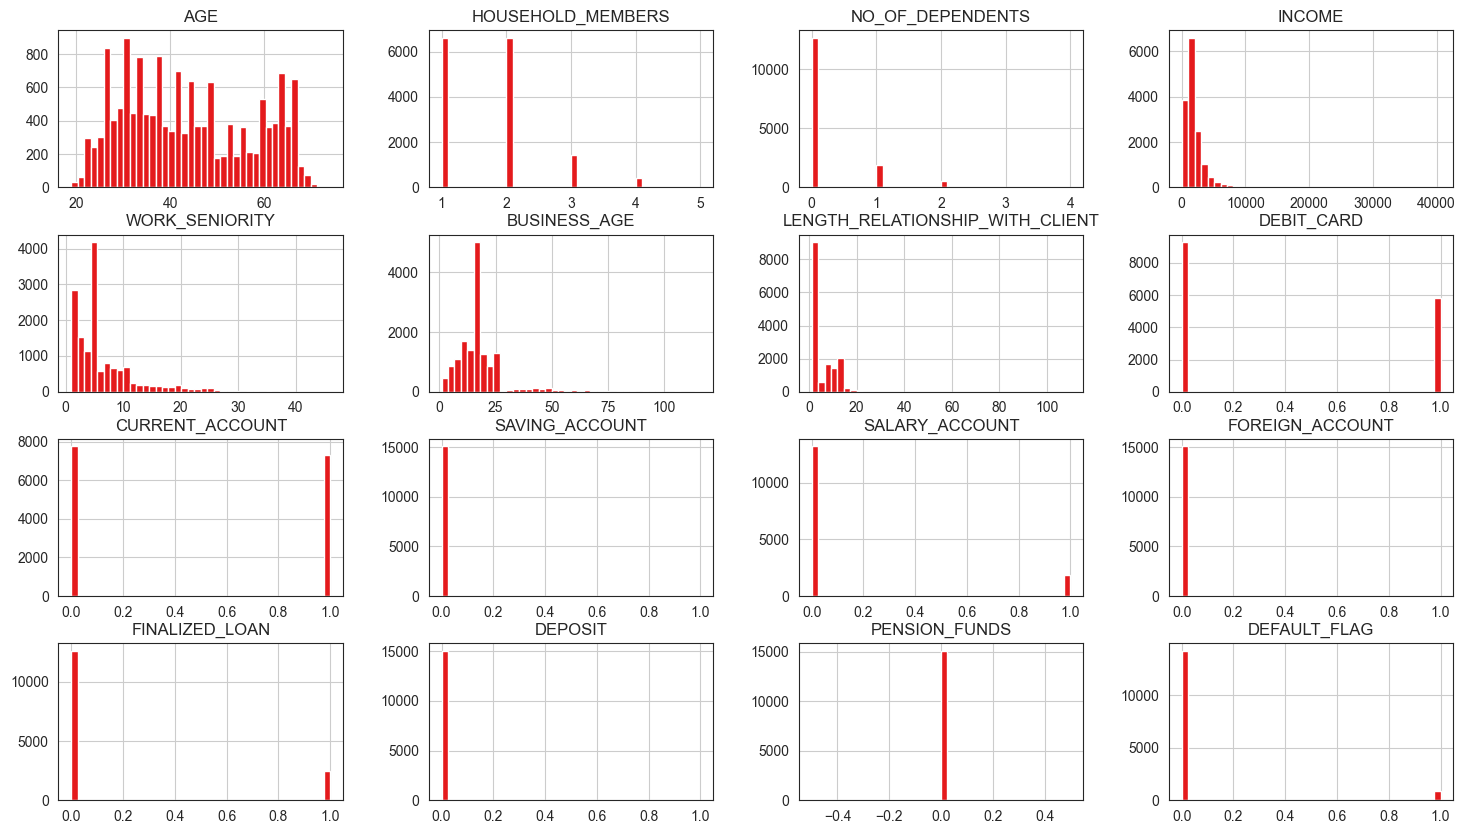

In [6]:
sns.set_style("white")
sns.set_palette("Set1")

numeric_data = df.select_dtypes(include = ["int64", "float64"])
numeric_data.hist(bins = 40, figsize = (18, 10));

In [7]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS_AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


## **Categorical variables**

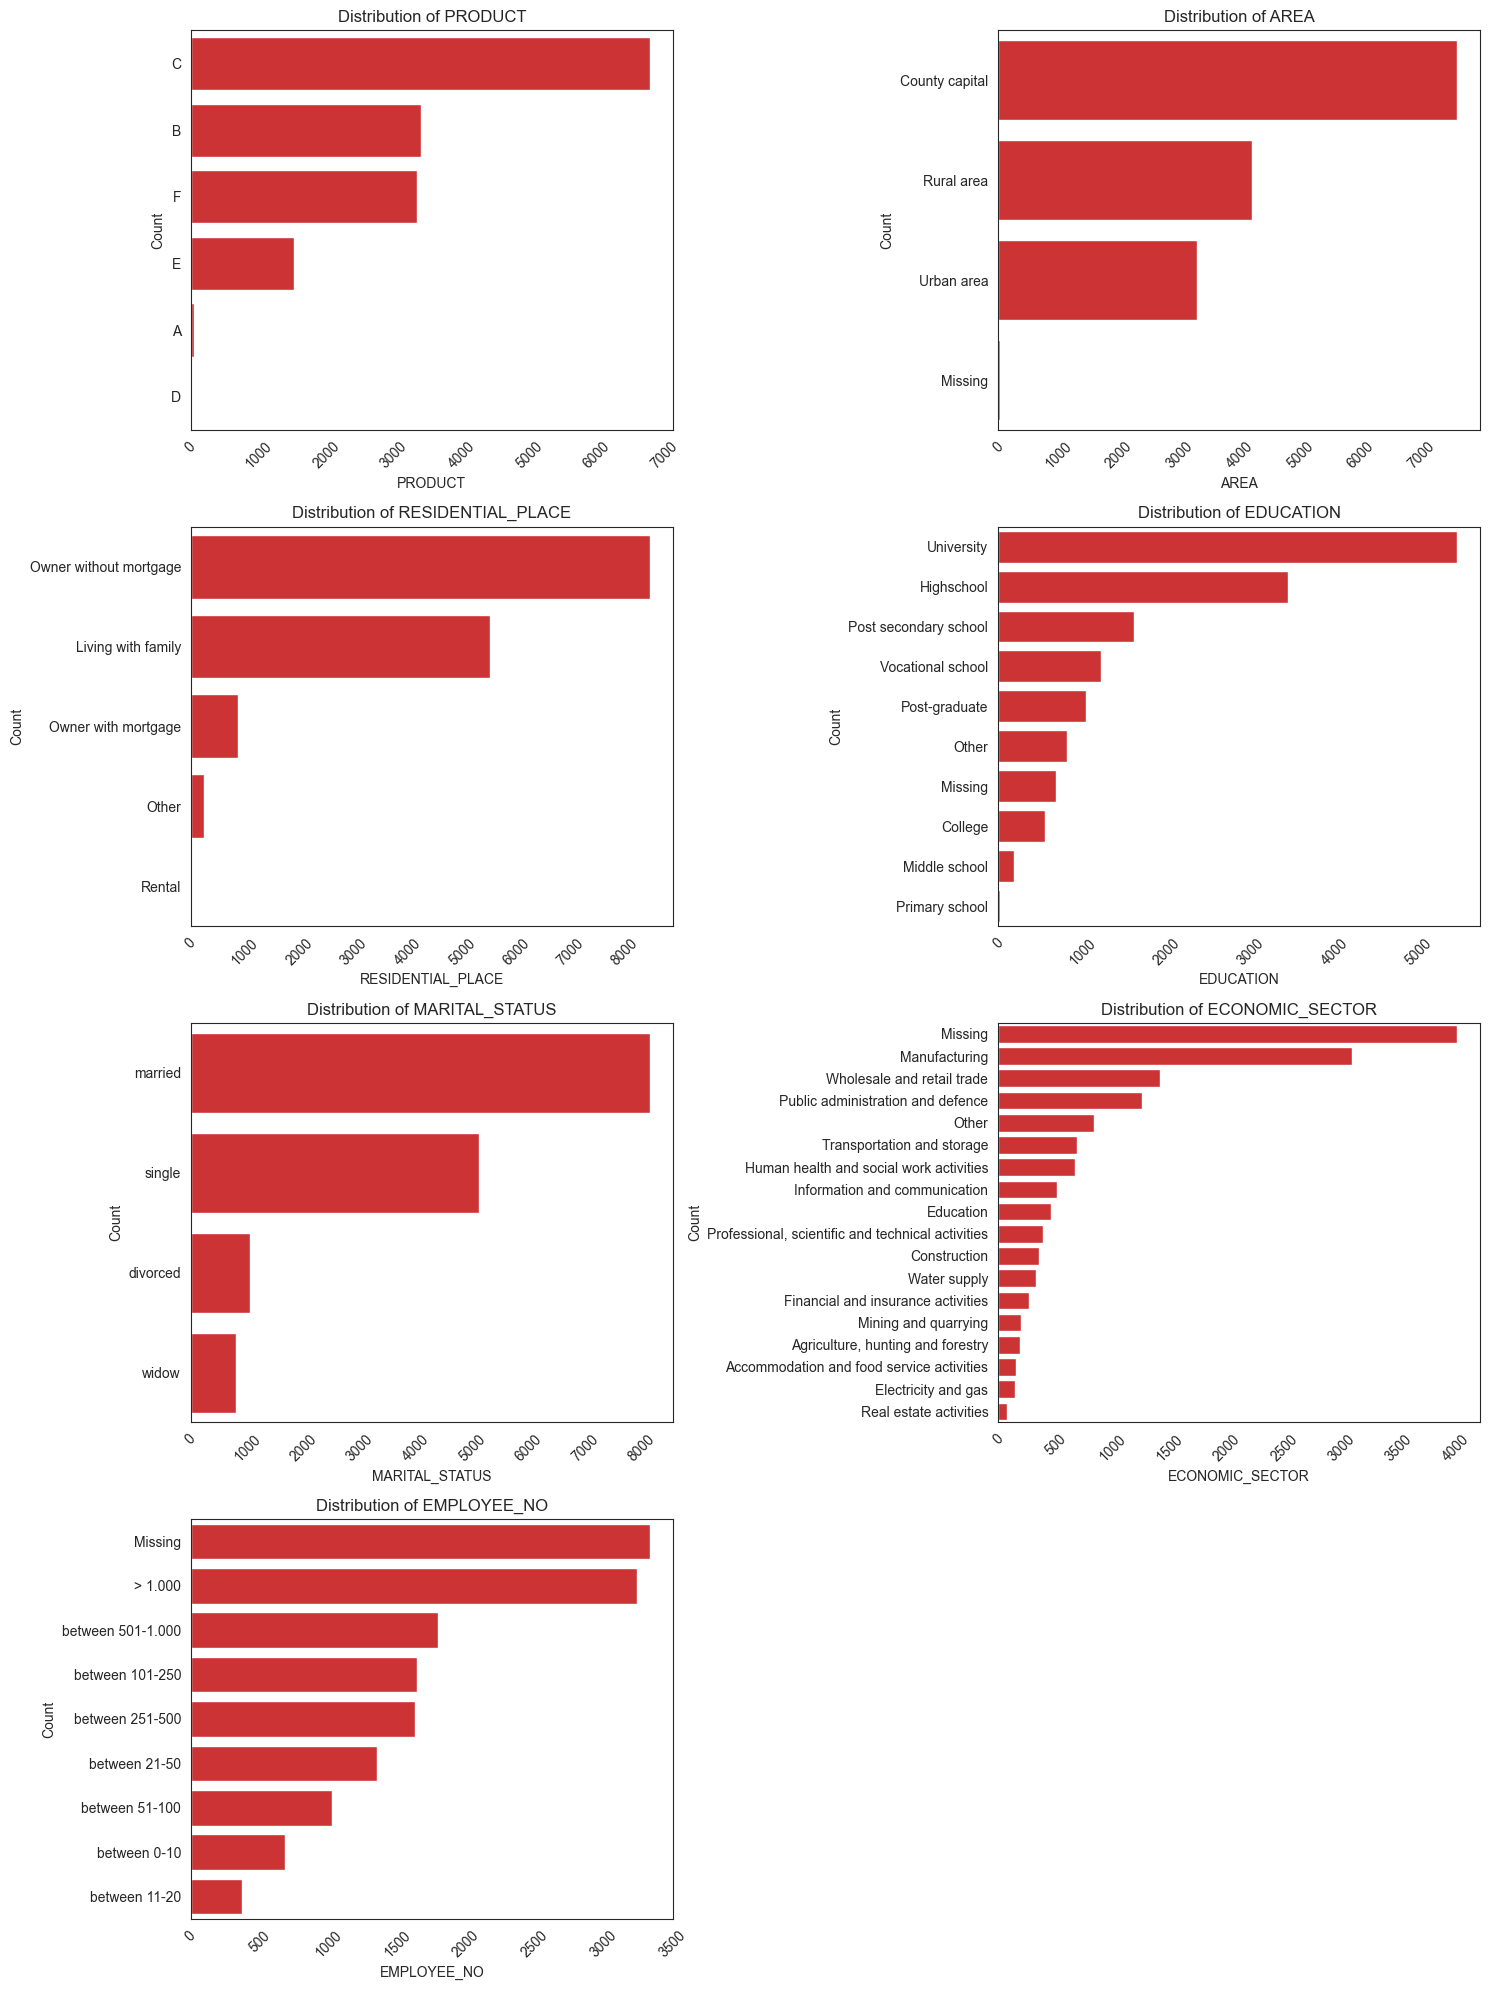

In [8]:
categorical_variables = df.select_dtypes(include = ["object"])

def plot_categorical_distribution(df):
    num_columns = len(df.columns)
    num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize = (15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.countplot(data = df, y = column, order = df[column].value_counts().index, ax = axes[i])
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis = "x", rotation = 45) 
    
    axes[-1].axis("off")

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(categorical_variables)

Missing is the most frequent value in EMPLOYEE_NO and ECONOMIC_SECTOR <br>
Low fraction of products A and D in PRODUCT <br>
Low franction of Rental in RESIDENTIAL_PLACE 

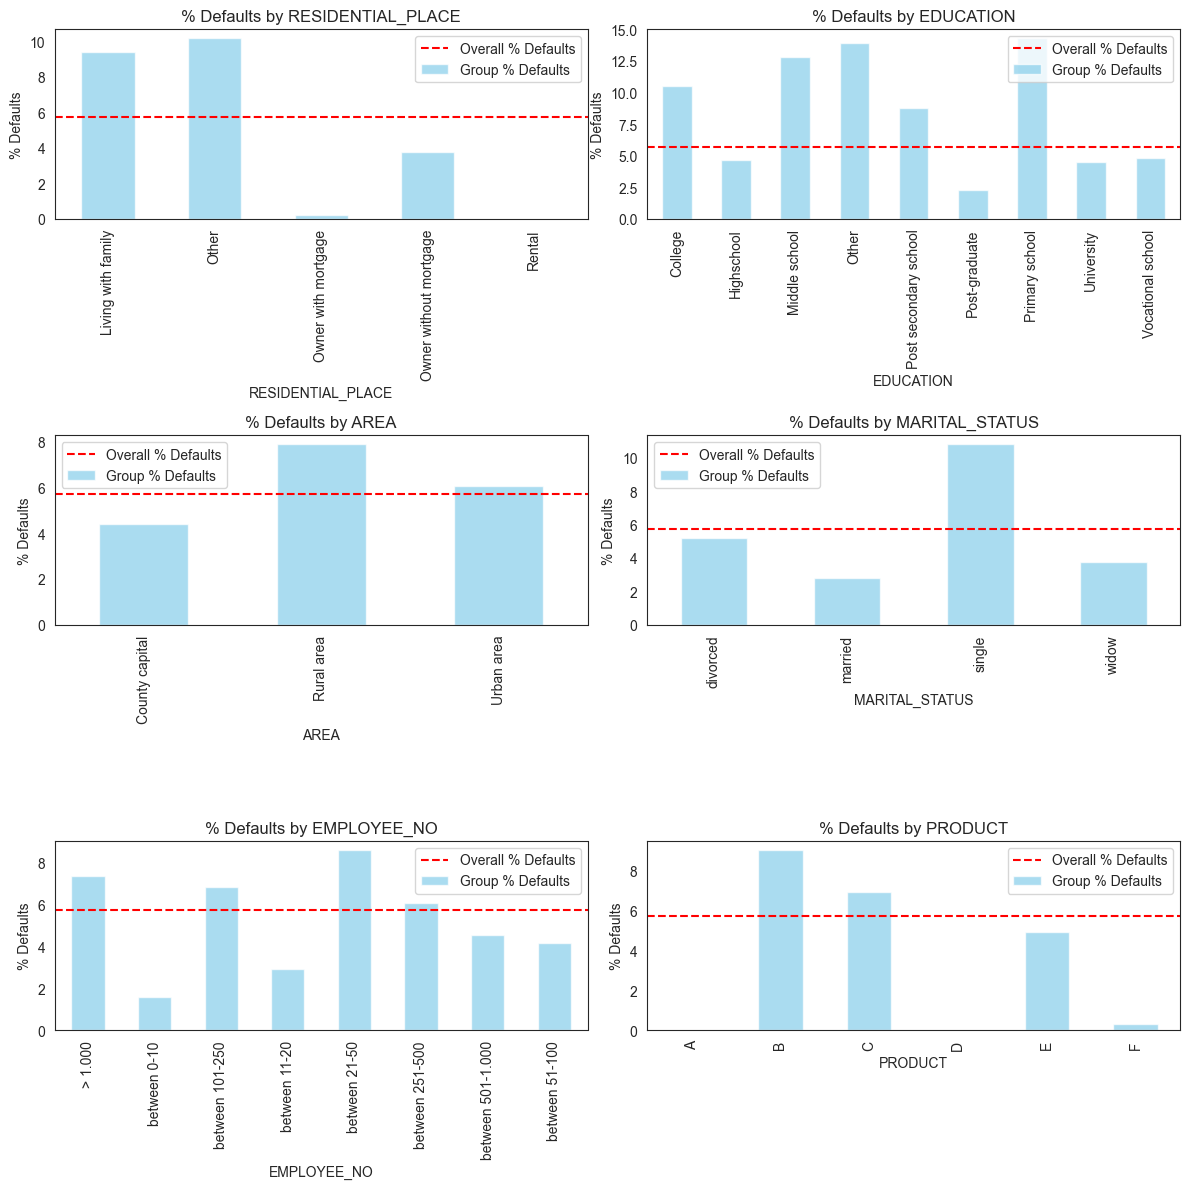

In [46]:
categorical_columns = ["RESIDENTIAL_PLACE", "EDUCATION", "AREA", "MARITAL_STATUS", "EMPLOYEE_NO", "PRODUCT"]

default_percentage = {}
for column in categorical_columns:
    default_percentage[column] = df.groupby(column)['DEFAULT_FLAG'].mean() * 100

overall_default_percentage = df['DEFAULT_FLAG'].mean() * 100

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    default_percentage[column].plot(kind='bar', ax=ax, color='skyblue', alpha=0.7, label='Group % Defaults')
    ax.axhline(overall_default_percentage, color='red', linestyle='--', label='Overall % Defaults')
    ax.set_title(f'% Defaults by {column}')
    ax.set_ylabel('% Defaults')
    ax.legend()

plt.tight_layout()
plt.show()

## **Potential relations**

### **INCOME vs EDUCATION**

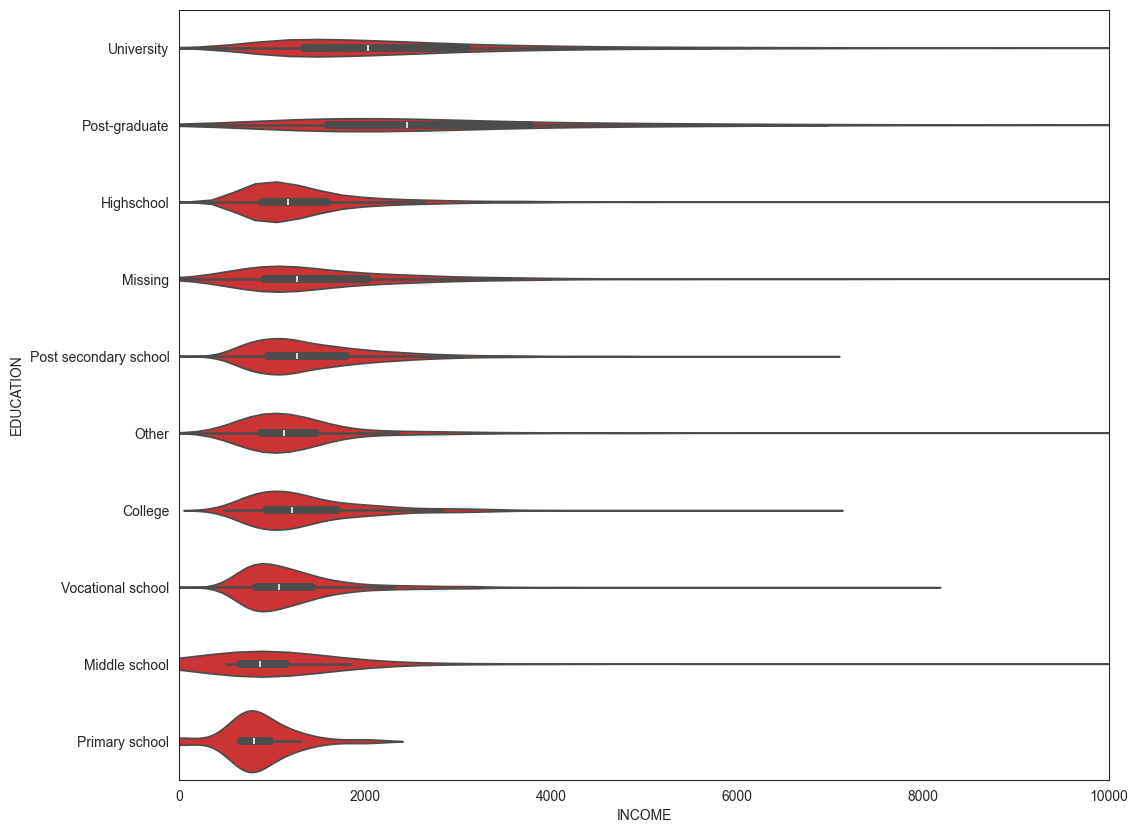

In [10]:
plt.figure(figsize = (12, 10))
sns.violinplot(data = df, y = "EDUCATION", x = "INCOME")
plt.xlim(0, 10000)
plt.show()

**Postgraduates and university graduates have higher income compared to other groups**

### **HOUSEHOLD_MEMBERS vs MARTIAL_STATUS**

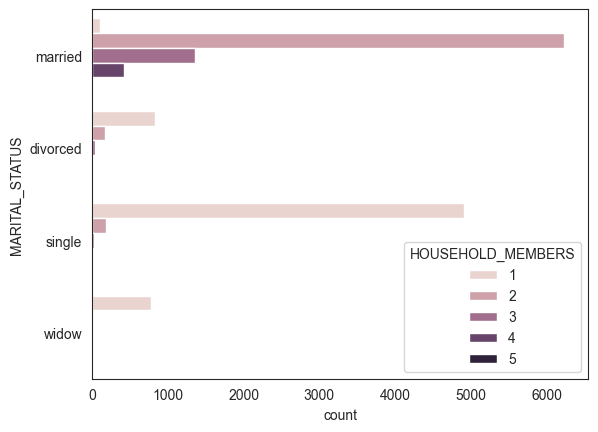

In [47]:
sns.countplot(data = df, y = "MARITAL_STATUS", hue = "HOUSEHOLD_MEMBERS")
plt.show()

**married - 2 household members** <br/>
**divorced, single, widow - 1 household member**

### **HOUSEHOLD_MEMBERS vs NO_OF_DEPENDENTS**

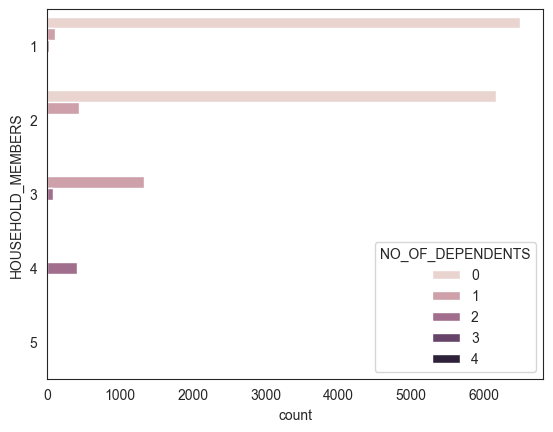

In [12]:
sns.countplot(data = df, y = "HOUSEHOLD_MEMBERS", hue = "NO_OF_DEPENDENTS")
plt.show()

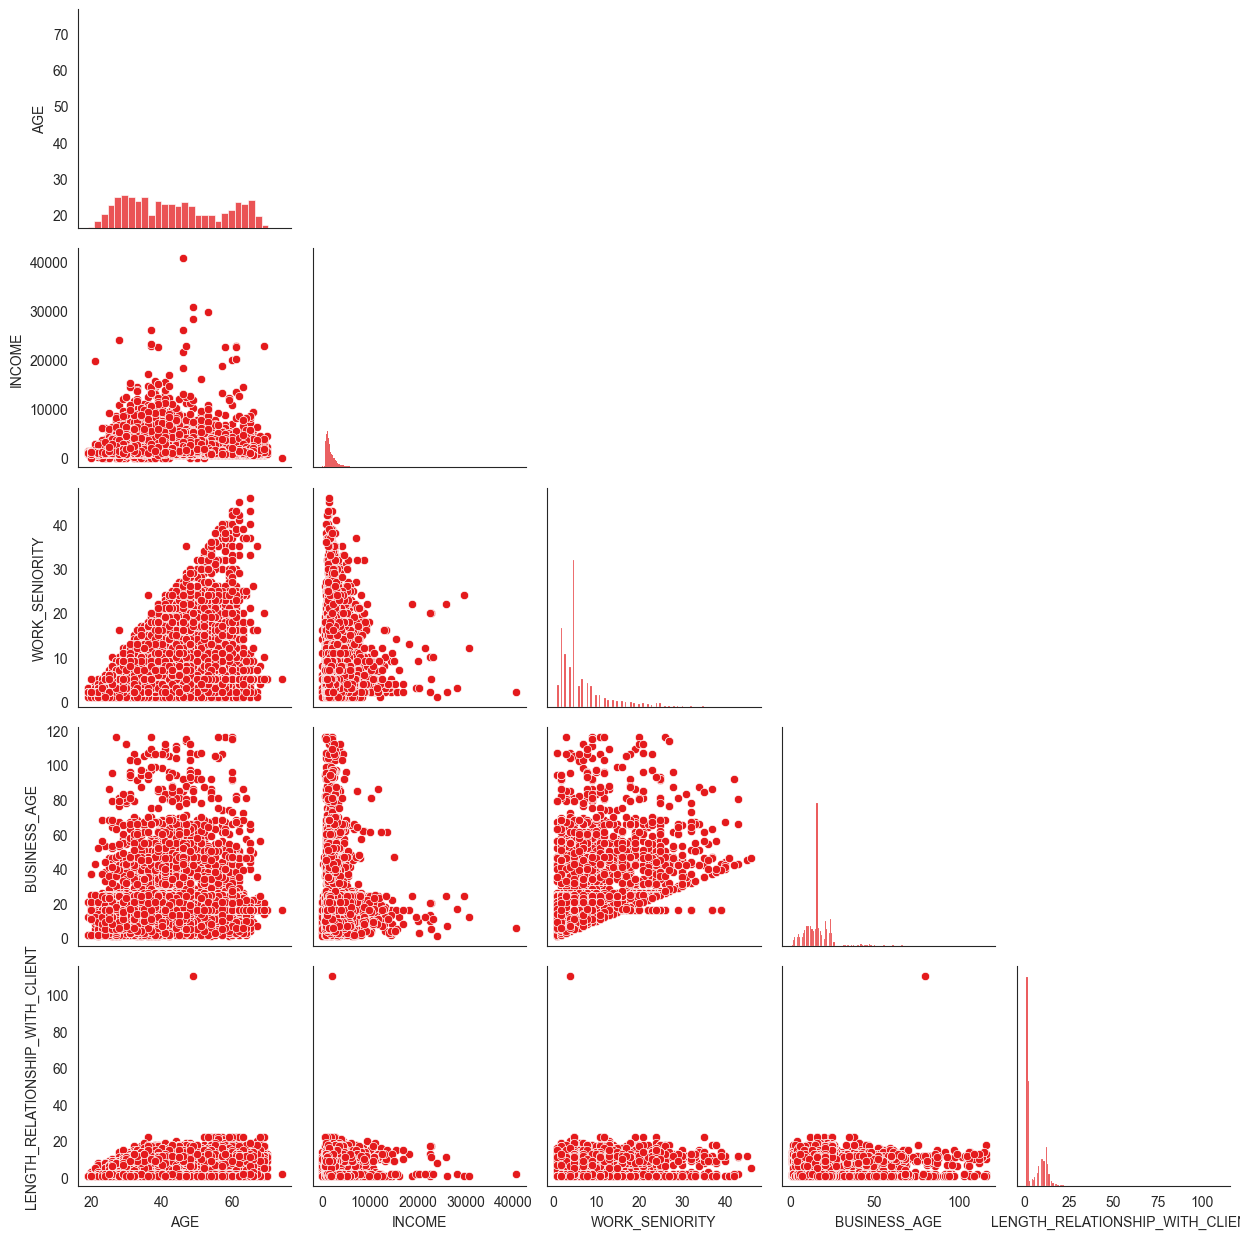

In [38]:
columns_to_plot = ["AGE", "INCOME", "WORK_SENIORITY", "BUSINESS_AGE", "LENGTH_RELATIONSHIP_WITH_CLIENT"]

pair_grid = sns.pairplot(df[columns_to_plot], kind = "scatter")

for i, j in zip(*np.triu_indices_from(pair_grid.axes, 1)):
    pair_grid.axes[i, j].set_visible(False)

plt.tight_layout()
plt.show()

## **Outliers**

### **LENGTH_RELATIONSHIP_WITH_CLIENT**

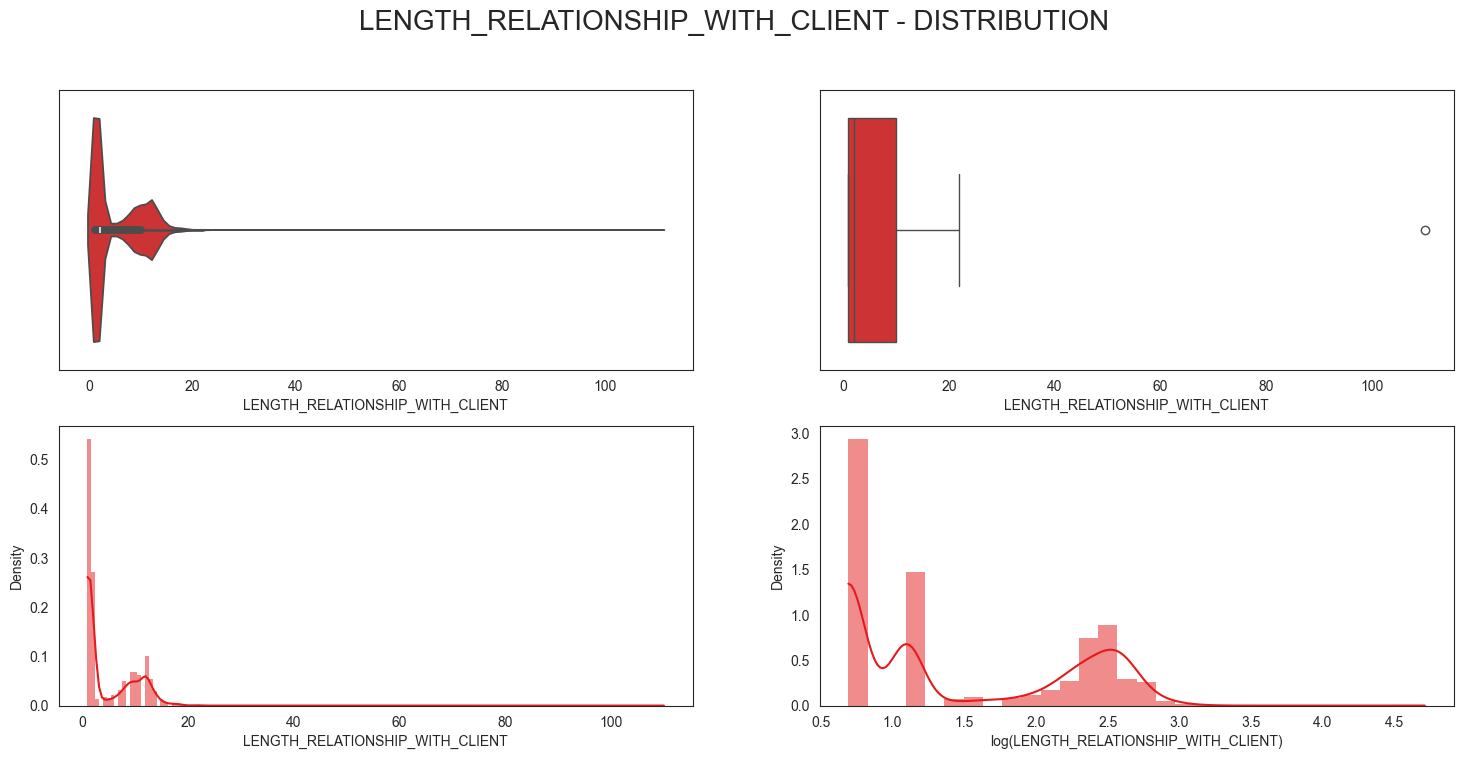

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 8))

sns.violinplot(x = df["LENGTH_RELATIONSHIP_WITH_CLIENT"], ax = axes[0, 0])
sns.boxplot(x = df["LENGTH_RELATIONSHIP_WITH_CLIENT"], ax = axes[0, 1])
sns.histplot(x = df["LENGTH_RELATIONSHIP_WITH_CLIENT"], ax = axes[1, 0], kde = True, stat = "density", linewidth = 0)
sns.histplot(x = np.log1p(df["LENGTH_RELATIONSHIP_WITH_CLIENT"]), ax = axes[1, 1], kde=True, stat = "density", linewidth = 0)

fig.suptitle("LENGTH_RELATIONSHIP_WITH_CLIENT - DISTRIBUTION", size = 20)
axes[1, 0].set_xlabel("LENGTH_RELATIONSHIP_WITH_CLIENT")
axes[1, 1].set_xlabel("log(LENGTH_RELATIONSHIP_WITH_CLIENT)")

plt.show()

In [16]:
def print_ouliers_info(col):
    z = np.abs(stats.zscore(df[col]))
    outliers = df[z > 3]
    print(f"number of outliers: {len(outliers)}")
    print(f"% of outliers: {round(len(outliers) * 100 / len(df), 3)} %")

In [17]:
print_ouliers_info("LENGTH_RELATIONSHIP_WITH_CLIENT")

number of outliers: 22
% of outliers: 0.146 %


### **WORK_SENIORITY**

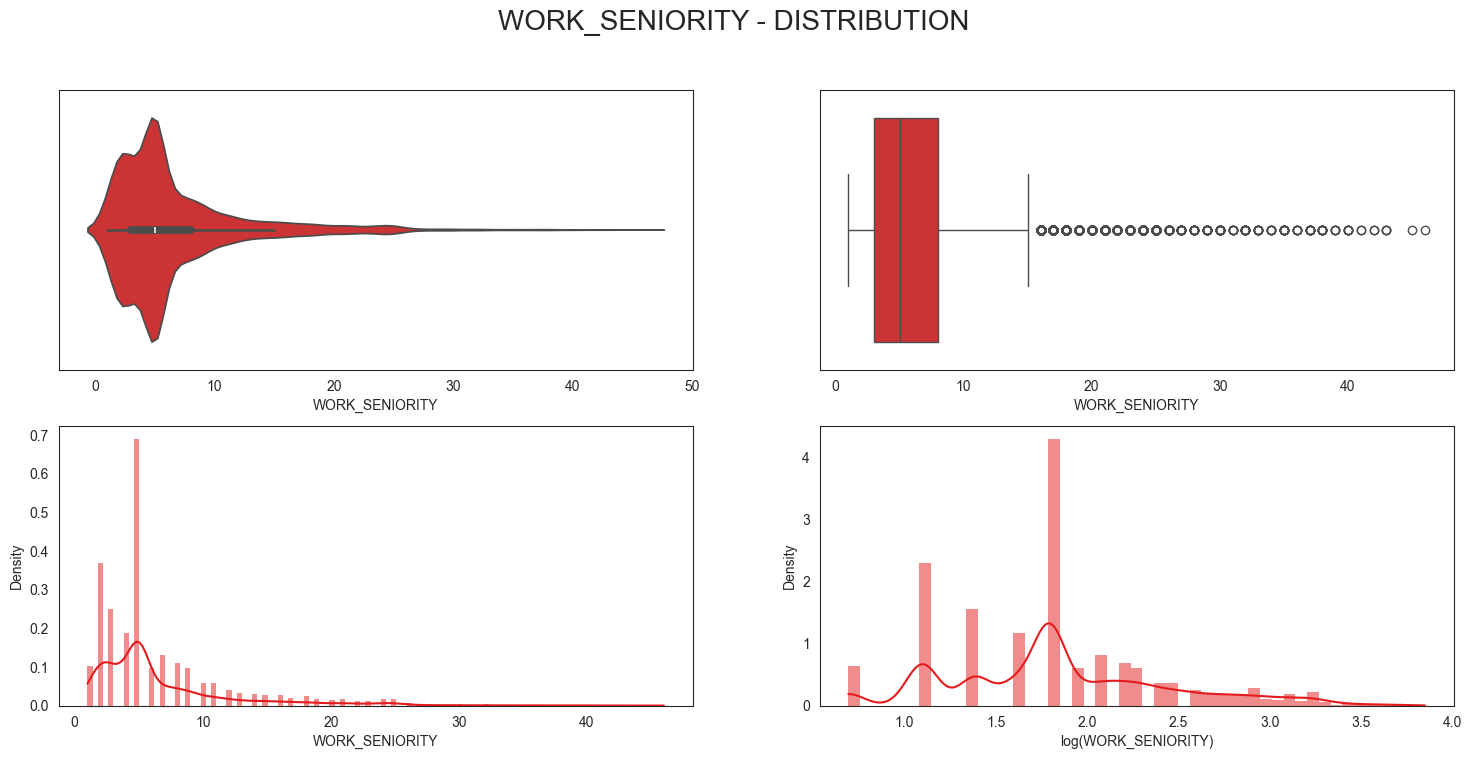

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 8))

sns.violinplot(x = df["WORK_SENIORITY"], ax = axes[0, 0])
sns.boxplot(x = df["WORK_SENIORITY"], ax = axes[0, 1])
sns.histplot(x = df["WORK_SENIORITY"], ax = axes[1, 0], kde = True, stat = "density", linewidth = 0)
sns.histplot(x = np.log1p(df["WORK_SENIORITY"]), ax = axes[1, 1], kde = True, stat = "density", linewidth = 0)

fig.suptitle("WORK_SENIORITY - DISTRIBUTION", size = 20)
axes[1, 0].set_xlabel("WORK_SENIORITY")
axes[1, 1].set_xlabel("log(WORK_SENIORITY)")

plt.show()

In [19]:
print_ouliers_info("WORK_SENIORITY")

number of outliers: 403
% of outliers: 2.669 %


### **BUSINESS_AGE**

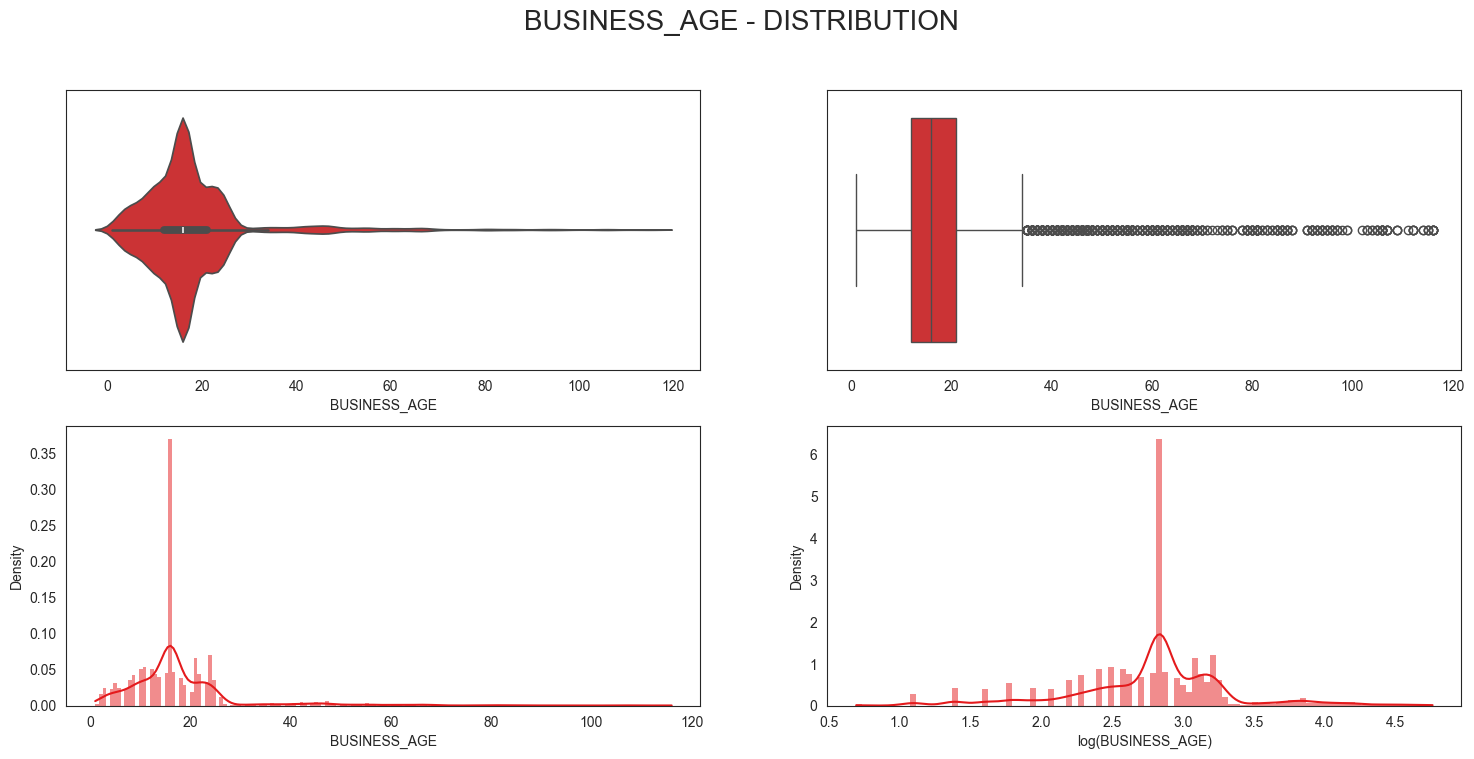

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 8))

sns.violinplot(x = df["BUSINESS_AGE"], ax = axes[0, 0])
sns.boxplot(x = df["BUSINESS_AGE"], ax = axes[0, 1])
sns.histplot(x = df["BUSINESS_AGE"], ax = axes[1, 0], kde = True, stat = "density", linewidth = 0)
sns.histplot(x = np.log1p(df["BUSINESS_AGE"]), ax = axes[1, 1], kde=True, stat = "density", linewidth = 0)

fig.suptitle("BUSINESS_AGE - DISTRIBUTION", size = 20)
axes[1, 0].set_xlabel("BUSINESS_AGE")
axes[1, 1].set_xlabel("log(BUSINESS_AGE)")

plt.show()

In [21]:
print_ouliers_info("BUSINESS_AGE")

number of outliers: 363
% of outliers: 2.404 %


### **OUTLIERS - CONCLUSION**
- maxiumum values of LENGTH_RELATIONSHIP_WITH_CLIENT **are** outliers
- maxiumum values of WORK_SENIORITY **are NOT** outliers as they match the distribution
- maxiumum values of BUSINESS AGE **are NOT** outliers as they match the distribution

## **IMPUTATION**

### **Missing values**

In [22]:
col_names = ["AREA", "EDUCATION", "ECONOMIC_SECTOR", "EMPLOYEE_NO"]
for col_name in col_names:
    print(col_name + " " + str(round(df[col_name].value_counts()["Missing"] * 100 / len(df), 3)) + "%")

AREA 0.219%
EDUCATION 4.577%
ECONOMIC_SECTOR 26.555%
EMPLOYEE_NO 22.11%


### **Most frequent values (mode) in each column**

In [23]:
for col_name in col_names:
    most_frequent = df[col_name].mode()
    print(most_frequent)

0    County capital
Name: AREA, dtype: object
0    University
Name: EDUCATION, dtype: object
0    Missing
Name: ECONOMIC_SECTOR, dtype: object
0    Missing
Name: EMPLOYEE_NO, dtype: object


In the columns **AREA** and **EDUCATION** we replace missing values with mode.

In [24]:
df["AREA"] = df["AREA"].replace("Missing", df["AREA"].mode()[0])
df["EDUCATION"] = df["EDUCATION"].replace("Missing", df["EDUCATION"].mode()[0])

In columns **ECONOMIC_SECTOR** and **EMPLOYEE_NO** mode is the missing value, we have to imput it using different technique. <br/>
We will impute missing values so that they match non-missing values distribution.

In [25]:
def impute_following_distribution(df, col_name):
    value_counts = df[col_name].value_counts()
    number_of_missing_values = value_counts["Missing"]
    value_counts_dict = value_counts[1:].to_dict()

    for key in value_counts_dict.keys():
        value_counts_dict[key] = value_counts_dict[key] / (len(df) - number_of_missing_values)

    df[col_name] = df[col_name].replace("Missing", np.random.choice(list(value_counts_dict.keys()), p = list(value_counts_dict.values())))

impute_following_distribution(df, "ECONOMIC_SECTOR")
impute_following_distribution(df, "EMPLOYEE_NO")

## **Low variance variables**

In [26]:
low_variance_col_names = ["SAVING_ACCOUNT", "FOREIGN_ACCOUNT", "DEPOSIT", "PENSION_FUNDS"]
for col_name in low_variance_col_names:
    print(df[col_name].value_counts())

SAVING_ACCOUNT
0    15091
1        6
Name: count, dtype: int64
FOREIGN_ACCOUNT
0    15095
1        2
Name: count, dtype: int64
DEPOSIT
0    15041
1       56
Name: count, dtype: int64
PENSION_FUNDS
0    15097
Name: count, dtype: int64


 Values **SAVING_ACCOUNT**, **FOREIGN_ACCOUNT**, **DEPOSIT** and **PENSION_FUNDS** have a very low variance. <br/>
 W will drop these columns.

In [27]:
df = df.drop(low_variance_col_names, axis = 1)
numeric_data = numeric_data.drop(low_variance_col_names, axis = 1)

## **First encoding of categorical variables**

Variables that are not ordinal: **PRODUCT**, **AREA**, **RESIDENTIAL_PLACE**, **EDUCATION**, **MARTIAL_STATUS**. <br/>
We will encode **EMPLOYEE_NO** to preserve order of its values.

In [28]:
categorical_col_names = ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS",
       "ECONOMIC_SECTOR"]

df_2 = pd.get_dummies(df, columns = categorical_col_names)

In [29]:
df_2.EMPLOYEE_NO.unique()

array(['between 501-1.000', '> 1.000', 'between 11-20', 'between 101-250',
       'between 0-10', 'between 51-100', 'between 21-50',
       'between 251-500'], dtype=object)

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder(categories = [["between 0-10", "between 11-20",
                                             "between 21-50", "between 51-100",
                                             "between 101-250", "between 251-500",
                                             "between 501-1.000", "> 1.000"]])

df_2["EMPLOYEE_NO"] = ordinalEncoder.fit_transform(df[["EMPLOYEE_NO"]])

In [31]:
df_2.head().T

,0,1,2,3,4
AGE,65,64,30,39,38
HOUSEHOLD_MEMBERS,2,2,2,1,1
NO_OF_DEPENDENTS,0,0,0,0,0
INCOME,1245.0,1380.0,1131.0,1730.0,1189.0
WORK_SENIORITY,5,5,2,9,5
BUSINESS_AGE,16,16,6,13,16
EMPLOYEE_NO,6.0,6.0,7.0,1.0,6.0
LENGTH_RELATIONSHIP_WITH_CLIENT,1,8,1,2,1
DEBIT_CARD,0,0,1,0,1
CURRENT_ACCOUNT,0,0,1,0,1


#### **Before encoding**

<Axes: >

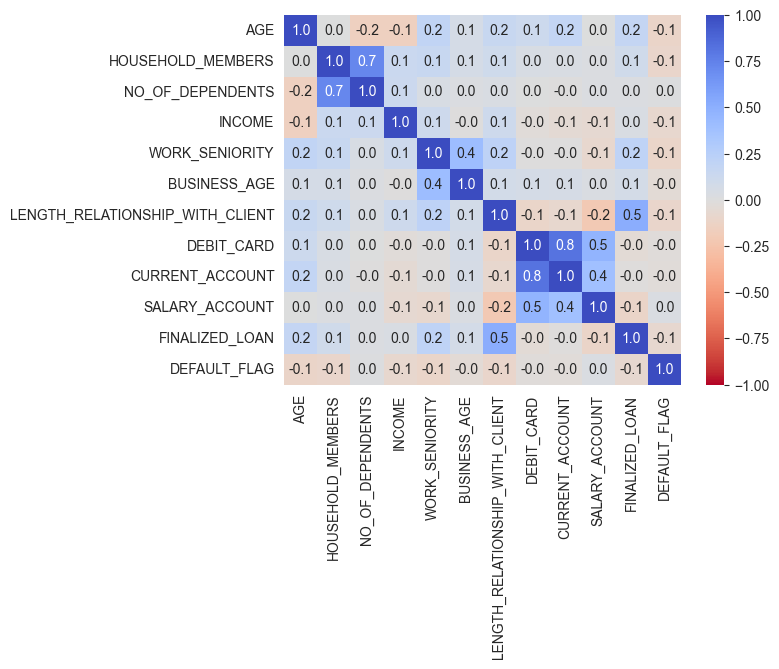

In [32]:
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm_r", fmt = ".1f", center = 0, vmin = -1, vmax = 1)

### **After encoding**

In [34]:
stats.pointbiserialr(df_2['DEFAULT_FLAG'], df_2['INCOME'])

SignificanceResult(statistic=-0.08410498268792697, pvalue=4.121754059427393e-25)

<Axes: >

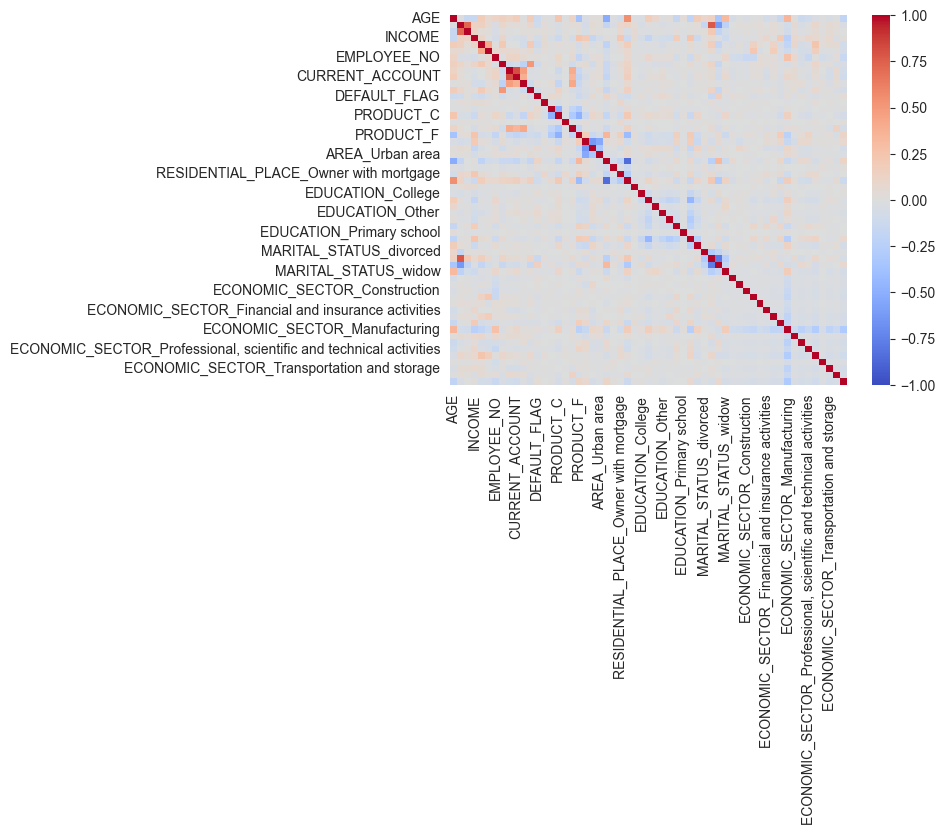

In [35]:
sns.heatmap(df_2.corr(), cmap = "coolwarm", fmt = ".1f", center = 0, vmin = -1, vmax = 1)